# **Hyperparameter tuning**

In [19]:
import pandas as pd

import os

from utils import plots
from utils import constants

## **Constants**

In [18]:
TUNING_FOLDER = constants.TUNING_FOLDER
LVL1_RESULTS = os.path.join(TUNING_FOLDER, 'lvl1.csv')
LVL2_RESULTS = os.path.join(TUNING_FOLDER, 'lvl2.csv')
LVL3_RESULTS = os.path.join(TUNING_FOLDER, 'lvl3.csv')

## **Level 1**

In [3]:
lvl1_df = pd.read_csv(LVL1_RESULTS)
lvl1_df.tail()

,date,model_name,source,target,score_type,score,epoch,parameters
315,2023-07-26 14:07:36.626009,es_gn_lvl1_transformer.npz,valid_es.txt.es,valid_gn.txt.gn,sacrebleu_corpus_bleu,2.614965,8,"{'devices': ['0', '1'], 'early-stopping': ['7'..."
316,2023-07-26 14:08:53.427986,es_gn_lvl1_transformer.npz,valid_es.txt.es,valid_gn.txt.gn,sacrebleu_corpus_chrf,18.309891,9,"{'devices': ['0', '1'], 'early-stopping': ['7'..."
317,2023-07-26 14:08:53.427986,es_gn_lvl1_transformer.npz,valid_es.txt.es,valid_gn.txt.gn,sacrebleu_corpus_bleu,2.817177,9,"{'devices': ['0', '1'], 'early-stopping': ['7'..."
318,2023-07-26 14:10:18.711054,es_gn_lvl1_transformer.npz,valid_es.txt.es,valid_gn.txt.gn,sacrebleu_corpus_chrf,18.513704,10,"{'devices': ['0', '1'], 'early-stopping': ['7'..."
319,2023-07-26 14:10:18.711054,es_gn_lvl1_transformer.npz,valid_es.txt.es,valid_gn.txt.gn,sacrebleu_corpus_bleu,2.899490,10,"{'devices': ['0', '1'], 'early-stopping': ['7'..."


**Visual analysis**

In [4]:
gn_es_results = lvl1_df[lvl1_df['source'].str.contains('gn', regex=False)]
es_gn_results = lvl1_df[lvl1_df['source'].str.contains('es', regex=False)]

### **GN -> ES**

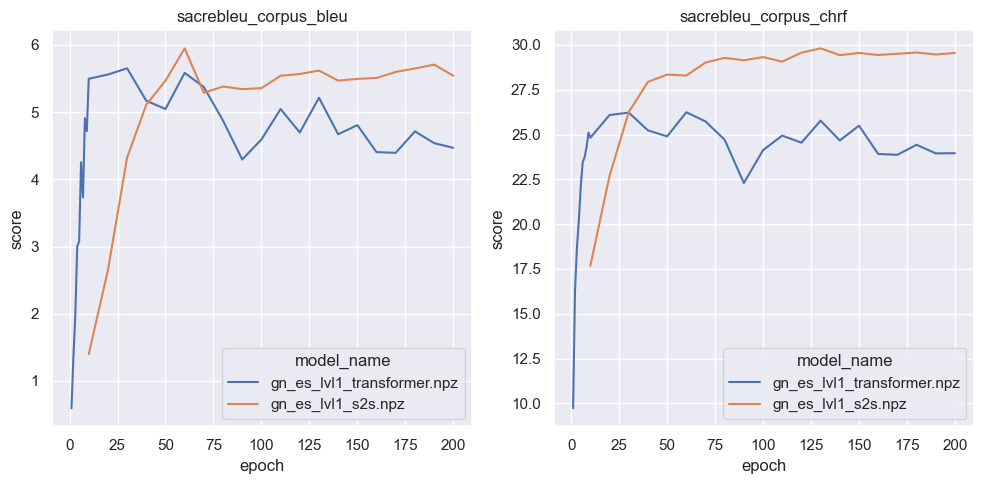

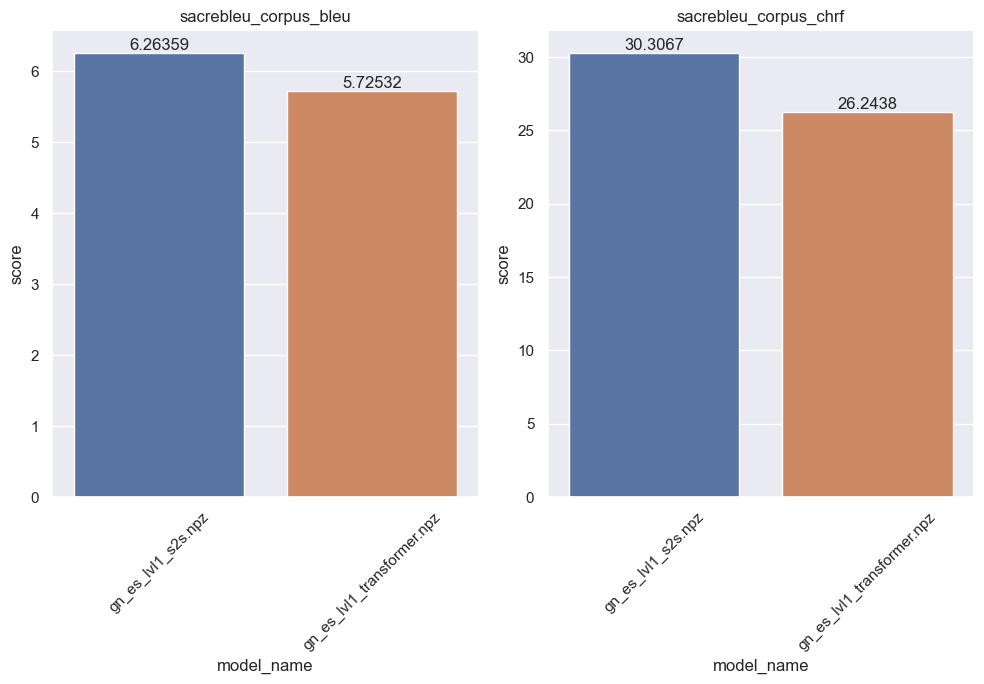

In [5]:
plots.plot_metric_by_epoch_foreach_model(gn_es_results, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(10,5));
plots.plot_max_score_by_model(gn_es_results, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(10,7));

### **ES -> GN**

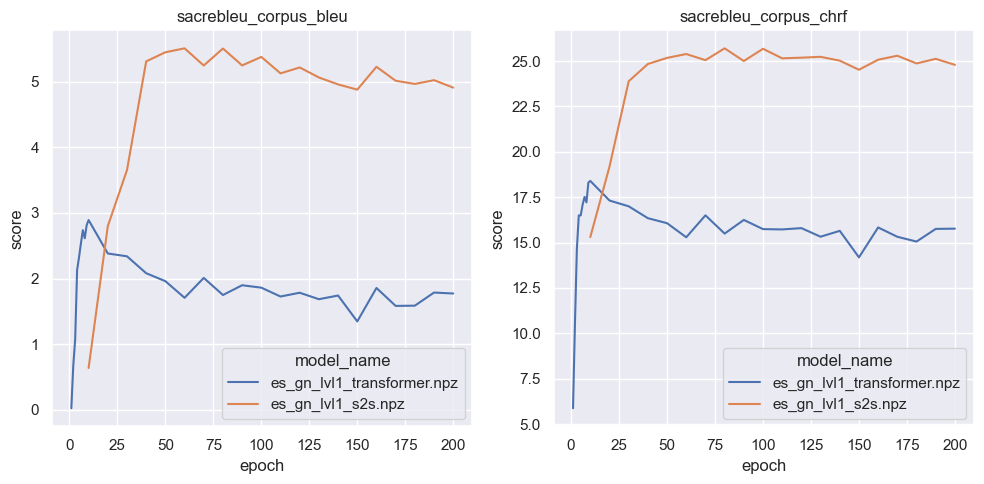

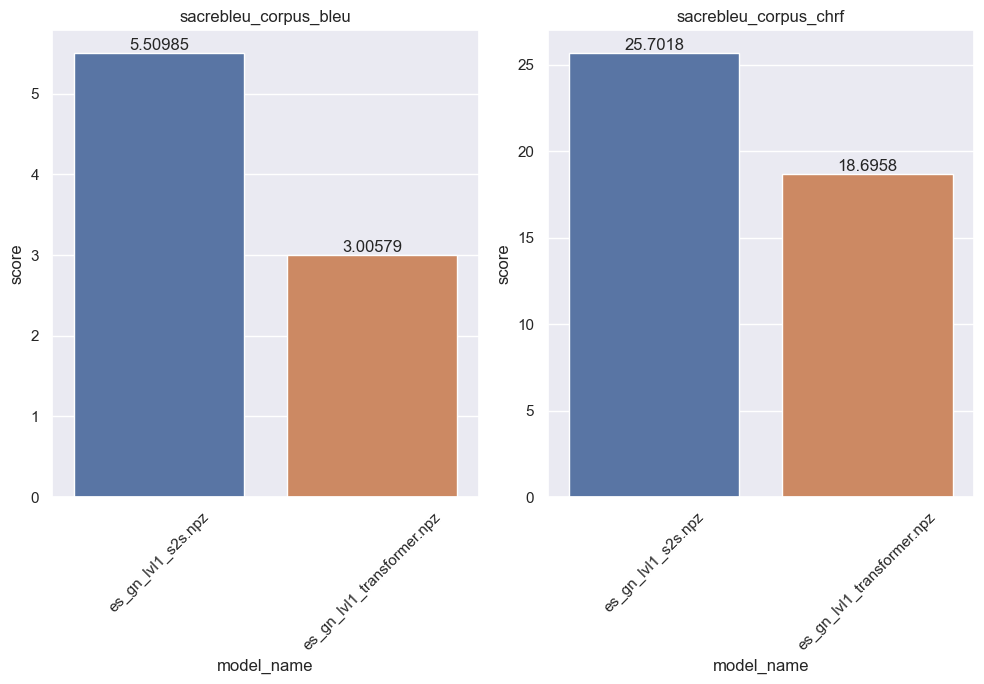

In [6]:
plots.plot_metric_by_epoch_foreach_model(es_gn_results, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(10,5));
plots.plot_max_score_by_model(es_gn_results, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(10,7));

## **Level 2**

In [7]:
lvl2_df = pd.read_csv(LVL2_RESULTS)
lvl2_df.tail()

,date,model_name,source,target,score_type,score,epoch,parameters
1563,2023-08-04 18:50:13.247111,lvl2_grid_gn_es_s2s_from15_to16_max-length_200...,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,15.481119,380,"{'type': ['s2s'], 'devices': ['0'], 'train-set..."
1564,2023-08-04 19:39:19.335075,lvl2_grid_gn_es_s2s_from15_to16_max-length_200...,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,36.378641,390,"{'type': ['s2s'], 'devices': ['0'], 'train-set..."
1565,2023-08-04 19:39:19.335075,lvl2_grid_gn_es_s2s_from15_to16_max-length_200...,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,15.409644,390,"{'type': ['s2s'], 'devices': ['0'], 'train-set..."
1566,2023-08-04 20:28:25.415945,lvl2_grid_gn_es_s2s_from15_to16_max-length_200...,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,36.290605,400,"{'type': ['s2s'], 'devices': ['0'], 'train-set..."
1567,2023-08-04 20:28:25.415945,lvl2_grid_gn_es_s2s_from15_to16_max-length_200...,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,15.194003,400,"{'type': ['s2s'], 'devices': ['0'], 'train-set..."


In [8]:
gn_es_lvl2_results = lvl2_df[lvl2_df['source'].str.contains('gn', regex=False)]
es_gn_lvl2_results = lvl2_df[lvl2_df['source'].str.contains('es', regex=False)]

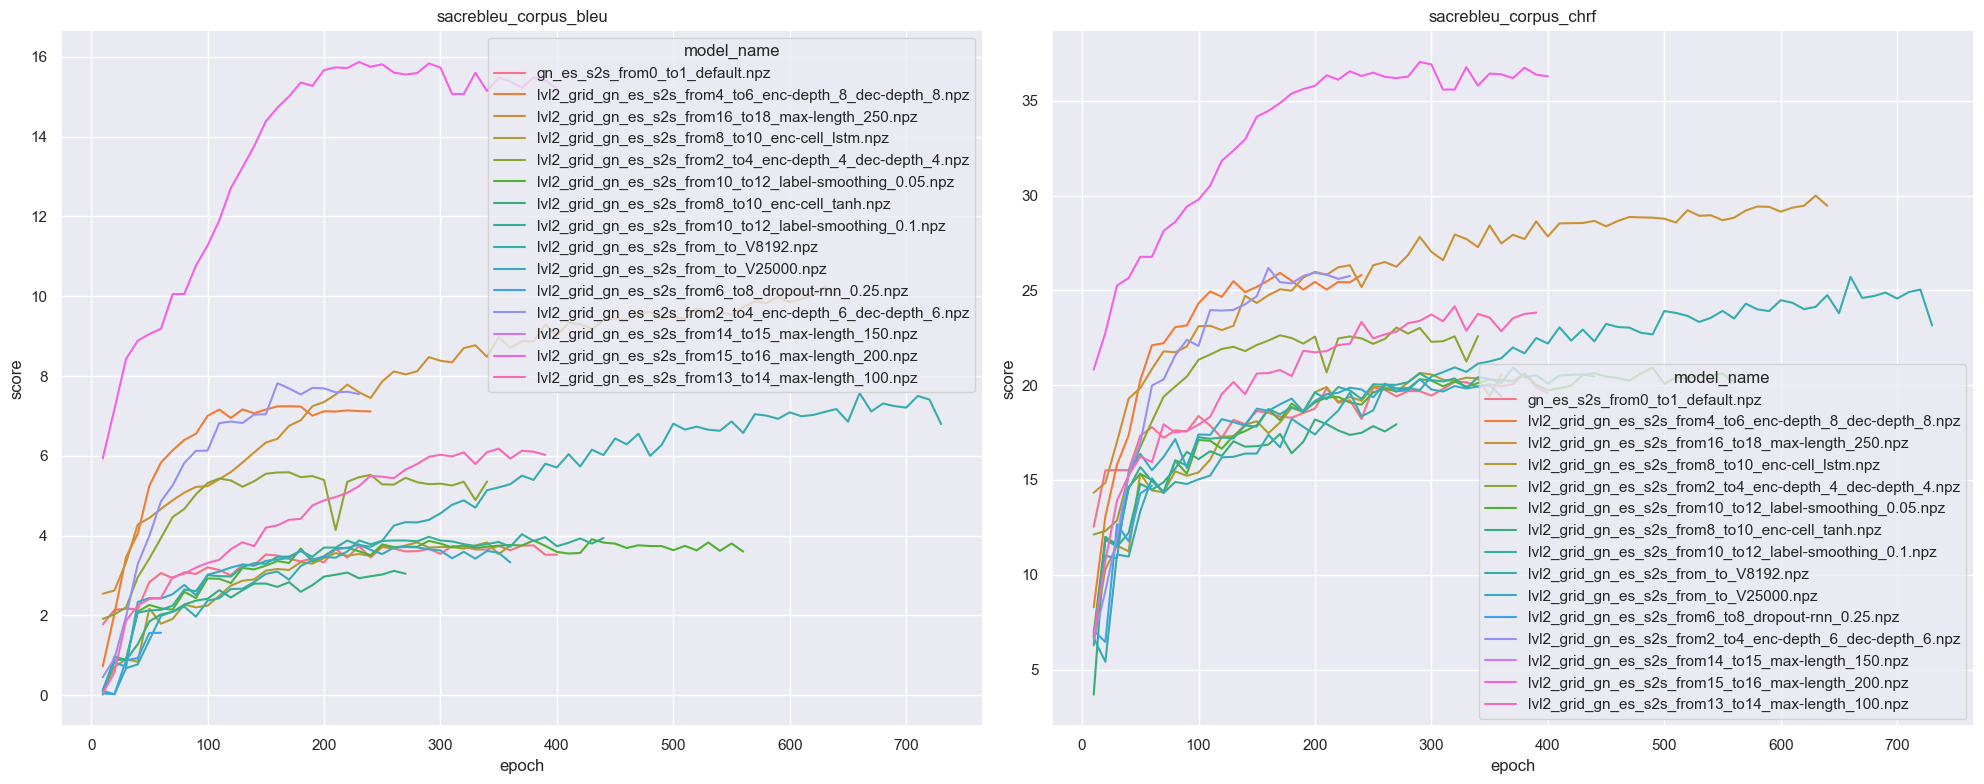

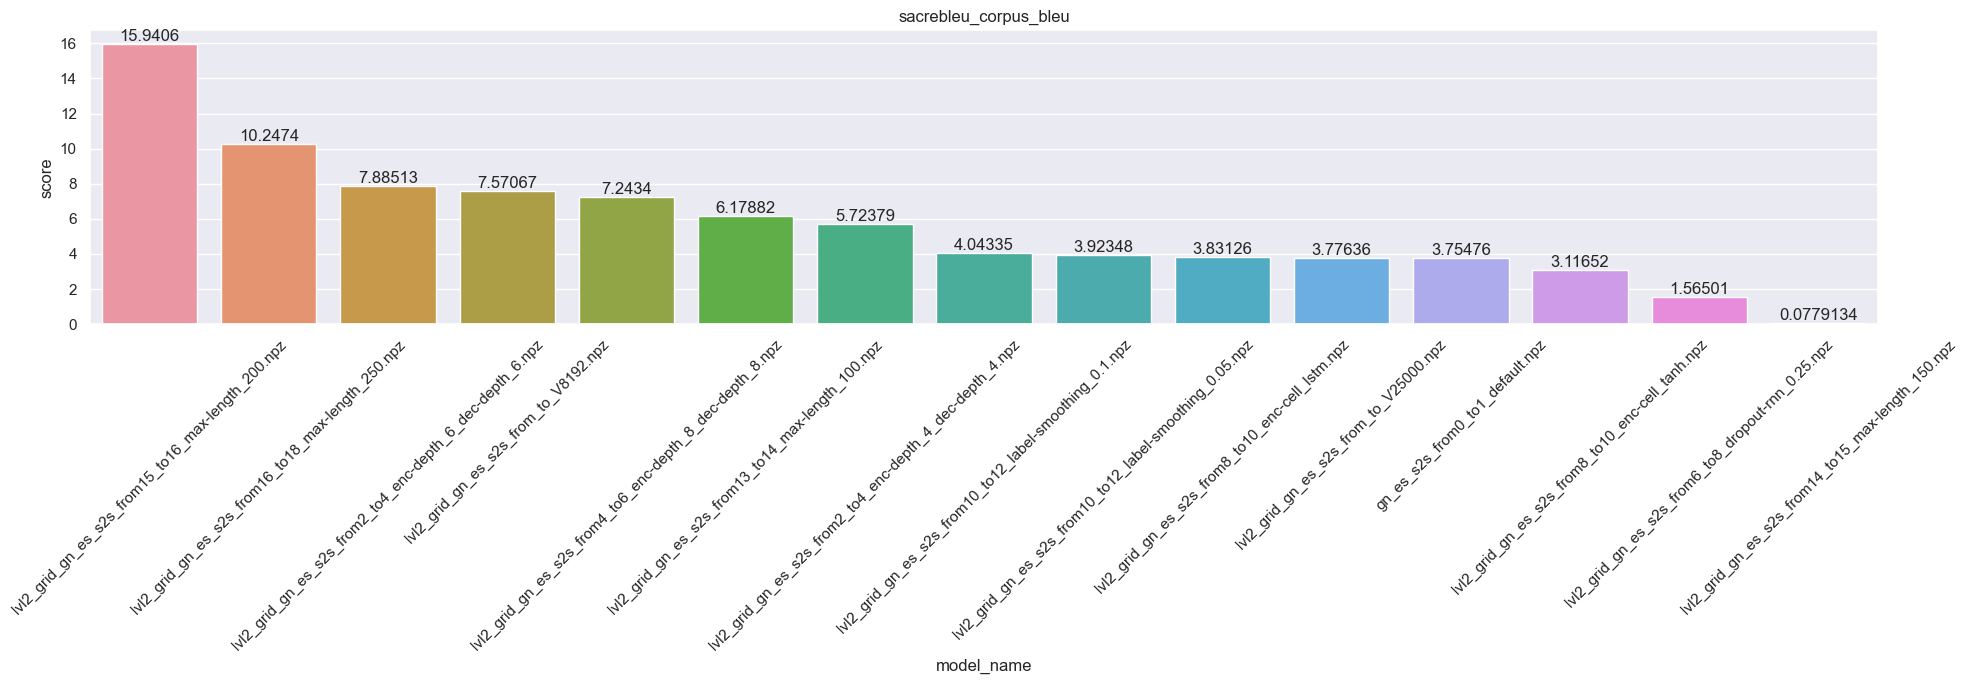

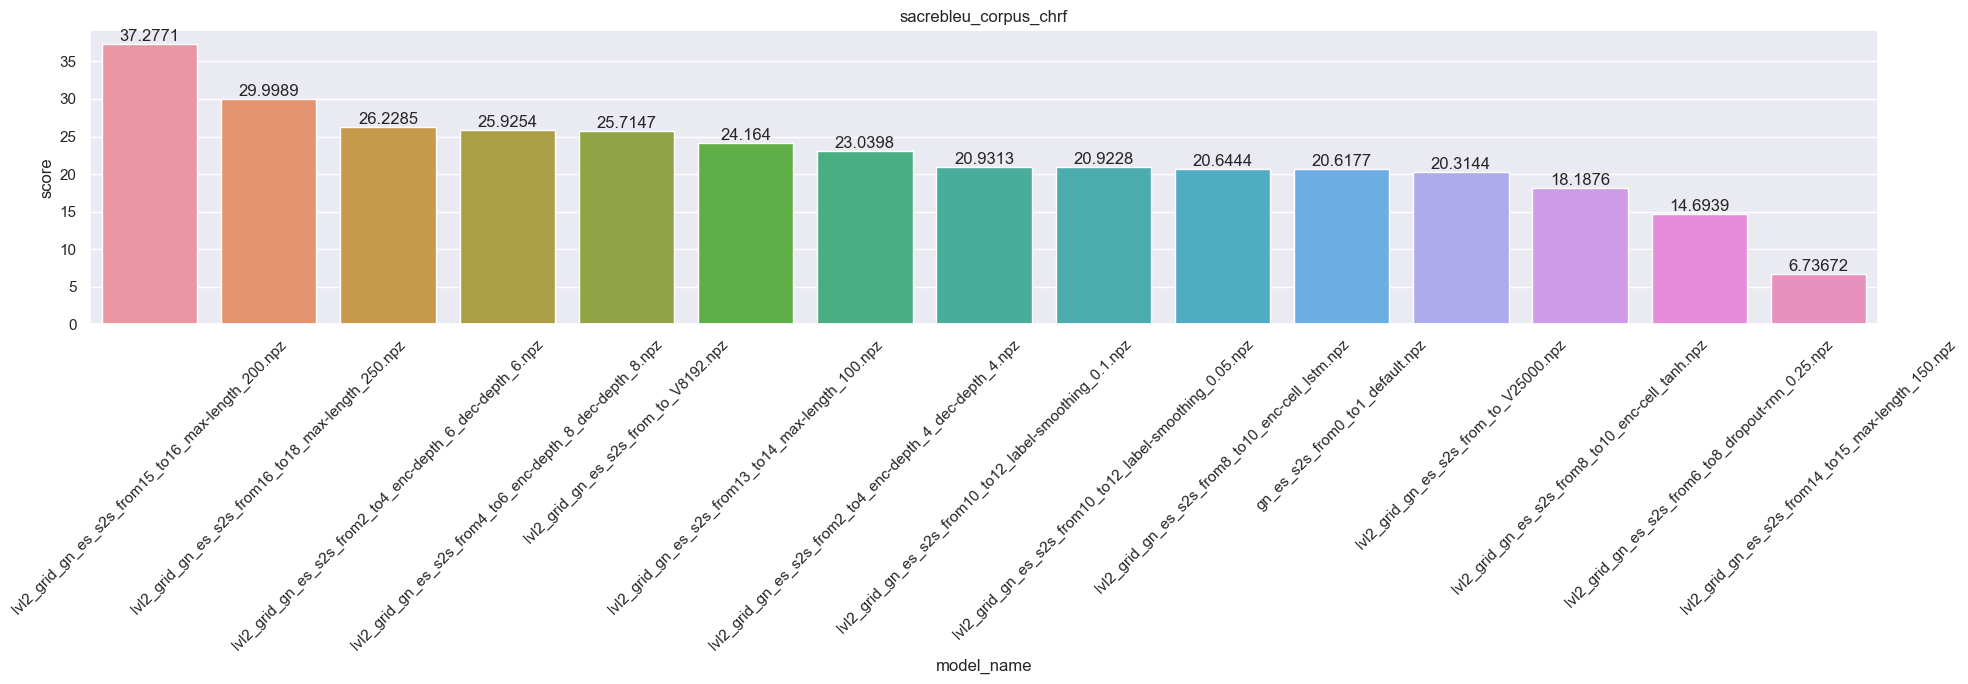

In [9]:
plots.plot_metric_by_epoch_foreach_model(gn_es_lvl2_results, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(20,8));
plots.plot_max_score_by_model(gn_es_lvl2_results, metrics=['sacrebleu_corpus_bleu'], figsize=(20,7));
plots.plot_max_score_by_model(gn_es_lvl2_results, metrics=['sacrebleu_corpus_chrf'], figsize=(20,7));

### **Level 2 metrics by hyperparameter**

```
- (enc-depth, dec-depth):   [(1, 1) {default}, (2, 2), (4, 4), (6, 6), (8, 8)]
- dropout-rnn:              [0 {default}, 0.25, 0.5]
- enc-cell:                 ["lstm", "tanh", "gru" {default}]
- sentencepiece-dim-vocabs: [2^13, 2^14 {our default}, 2^15]
- label-smoothing:          [0 {default}, 0.05, 0.1]
- max-length:               [100, 150, 200, 250]
- crop-max-length:          [true {our default}]

```

In [10]:
def extract_features(lvl1_df: pd.DataFrame, lvl2_df: pd.DataFrame, feature: str, column='parameters'):
    filtered_df = lvl2_df[lvl2_df[column].str.contains(feature)]
    default_df = lvl2_df[lvl2_df['model_name'].str.contains('default')]
    filtered_df = pd.concat([default_df, filtered_df])
    #lvl1_results = lvl1_df[lvl1_df['model_name'].str.contains('lvl1')]
    #filtered_df = pd.concat([filtered_df, lvl1_results])

    return filtered_df

#### **GN -> ES**

##### **Seq2Seq**

In [11]:
from utils import plots

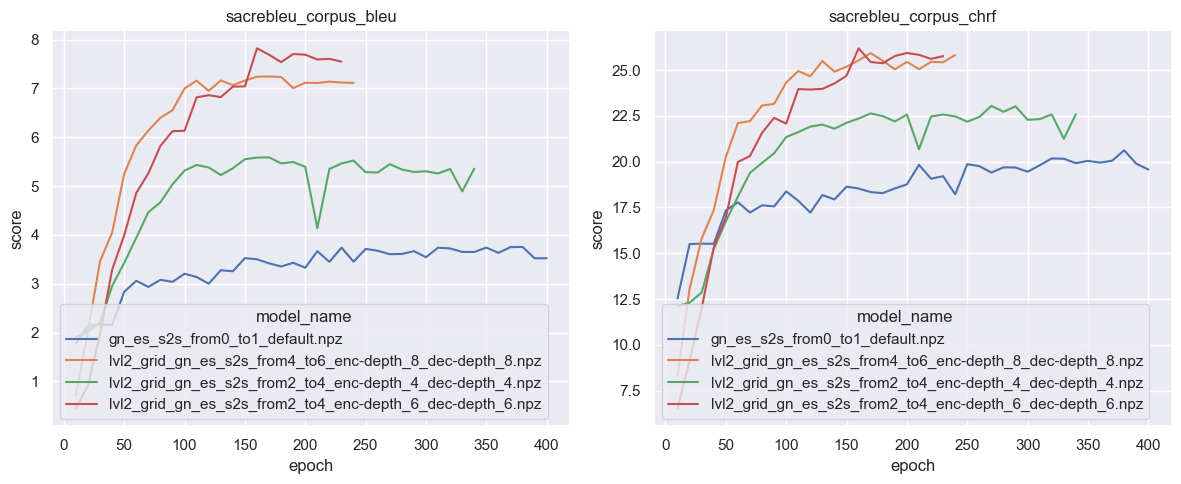

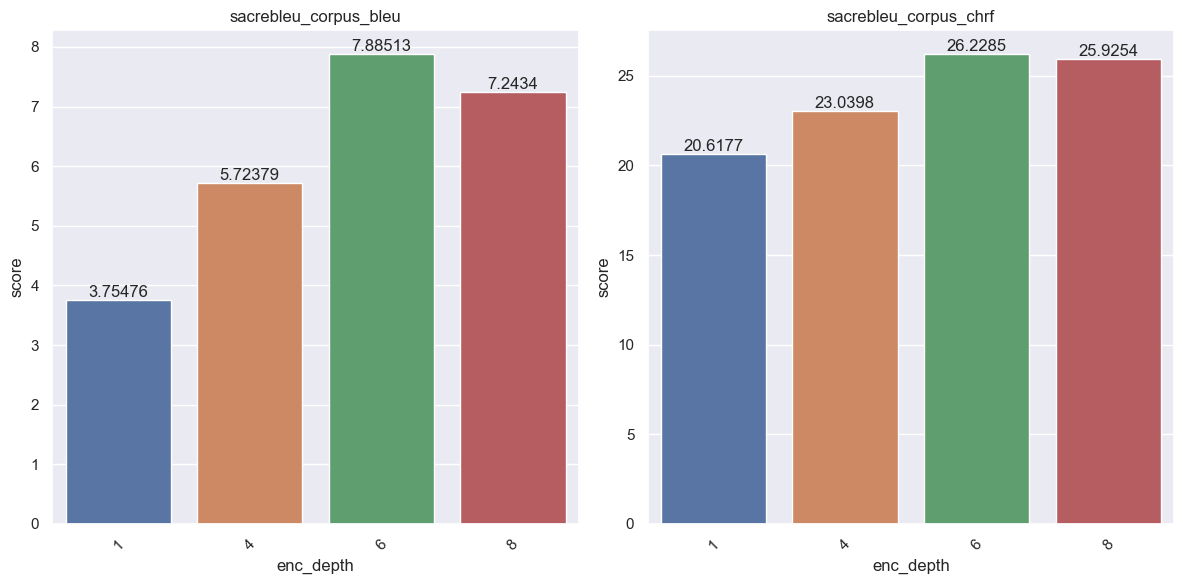

In [12]:
enc_dec_depth_df = extract_features(gn_es_results, gn_es_lvl2_results, 'enc-depth')
plots.plot_metric_by_epoch_foreach_model(enc_dec_depth_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,5));
enc_dec_depth_df_sorted_by_depth = enc_dec_depth_df.copy()
enc_dec_depth_df_sorted_by_depth['enc_depth'] = [int(x[-5]) if 'enc-depth' in x else 1 for x in enc_dec_depth_df_sorted_by_depth['model_name']]
plots.plot_max_score_by_model(enc_dec_depth_df_sorted_by_depth, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,6), x_col='enc_depth', sort_by='enc_depth', ascending=True);


**Dropout RNN**

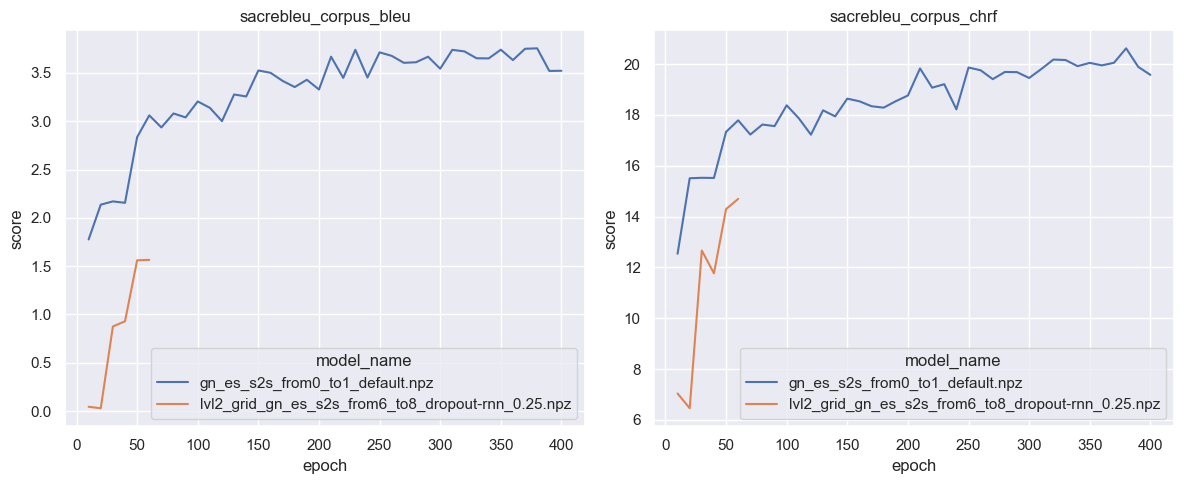

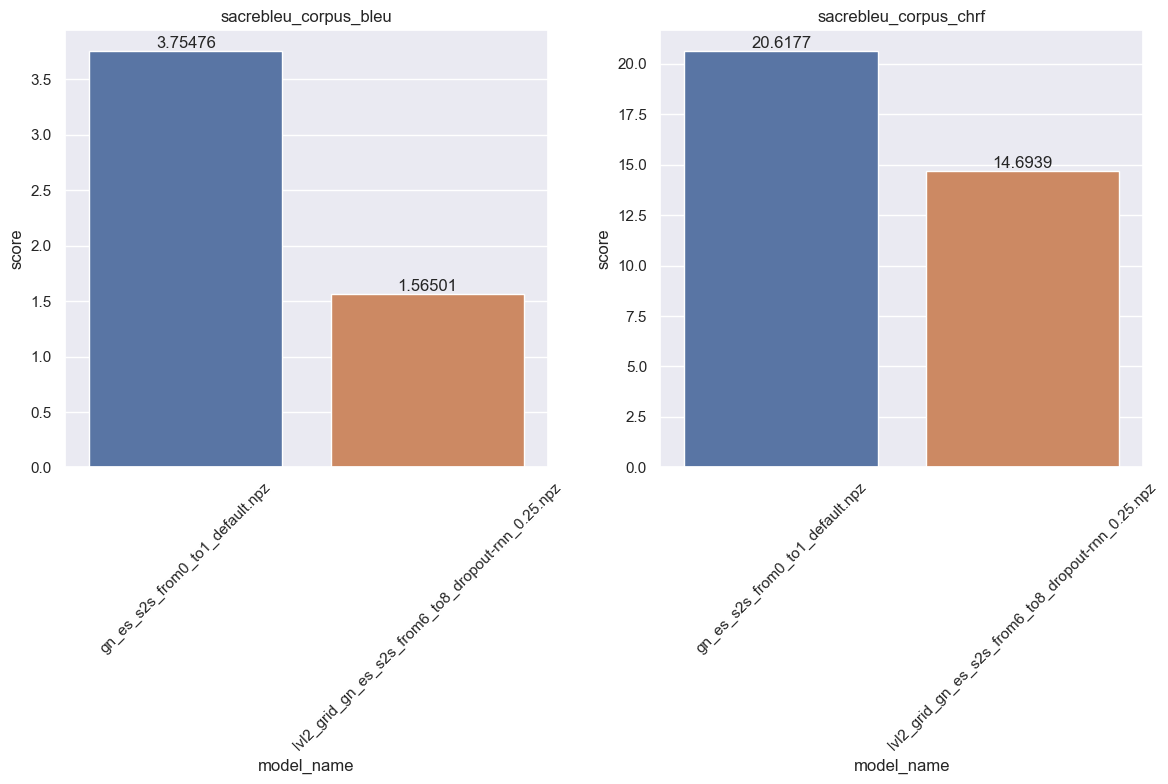

In [13]:
enc_dec_depth_df = extract_features(gn_es_results, gn_es_lvl2_results, 'dropout-rnn', column="model_name")
plots.plot_metric_by_epoch_foreach_model(enc_dec_depth_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,5));
plots.plot_max_score_by_model(enc_dec_depth_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,8));

**Encoder Cell**

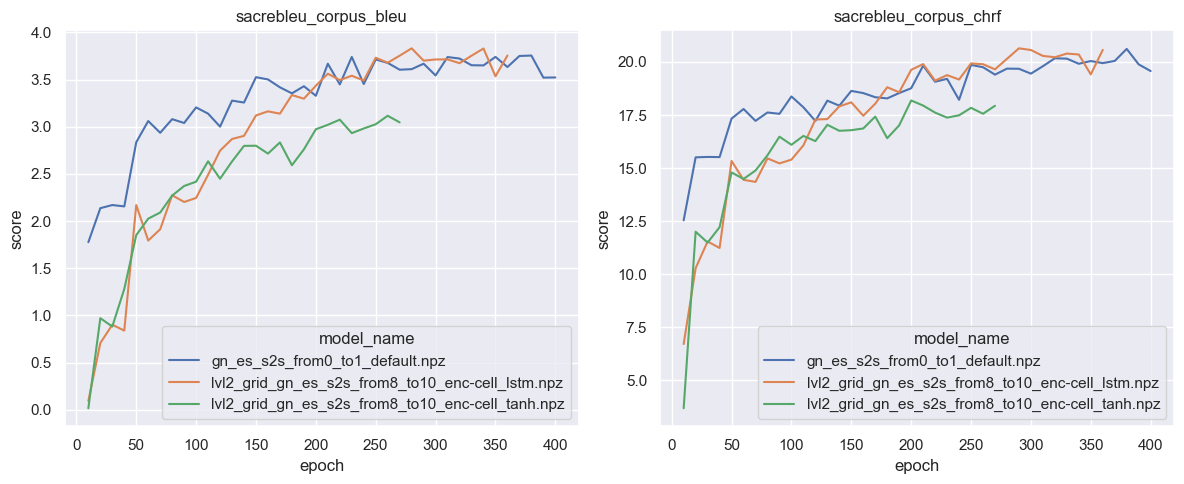

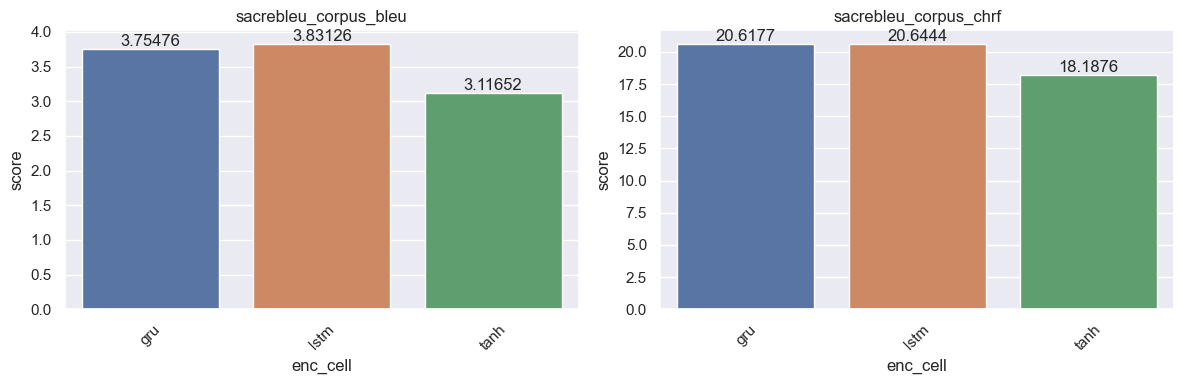

In [14]:
enc_cell_df = extract_features(gn_es_results, gn_es_lvl2_results, 'enc-cell')
plots.plot_metric_by_epoch_foreach_model(enc_cell_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,5));
enc_cell_df['enc_cell'] = [x[-8:-4] if 'enc-cell' in x else 'gru' for x in enc_cell_df['model_name']]
plots.plot_max_score_by_model(enc_cell_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,4), x_col='enc_cell', sort_by='enc_cell', ascending=True);

**Sentence Piece Vocab Size**

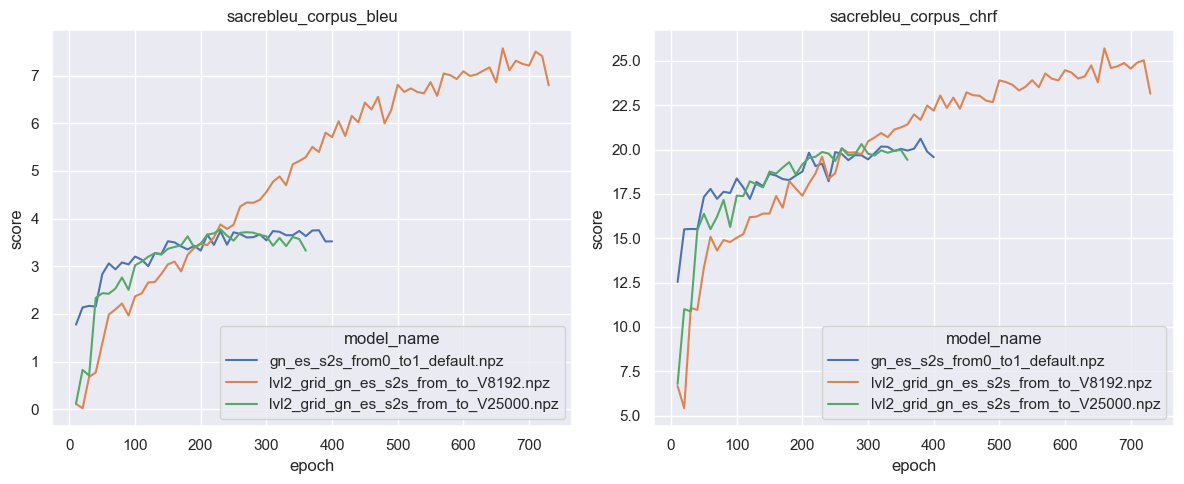

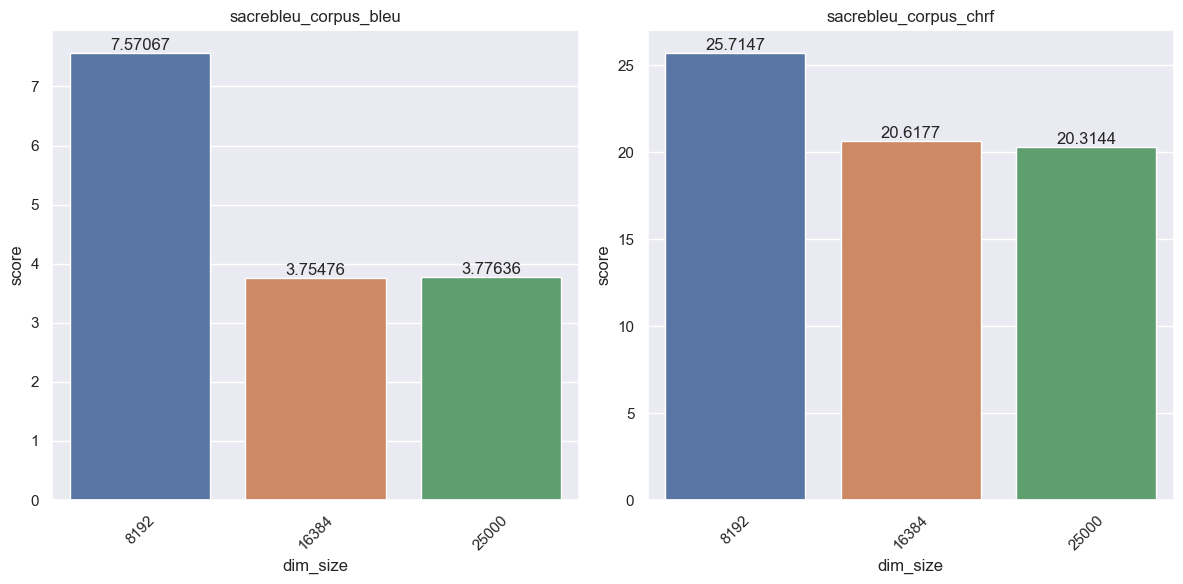

In [15]:
dim_size_df = extract_features(gn_es_results, gn_es_lvl2_results, '_V', column='model_name')
plots.plot_metric_by_epoch_foreach_model(dim_size_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,5));
dim_size_df['dim_size'] = [int(x[-9:-4].replace('V','')) if 'V' in x else 2**14 for x in dim_size_df['model_name']]
plots.plot_max_score_by_model(dim_size_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,6), x_col='dim_size', sort_by='dim_size', ascending=True);

**Label smoothing**

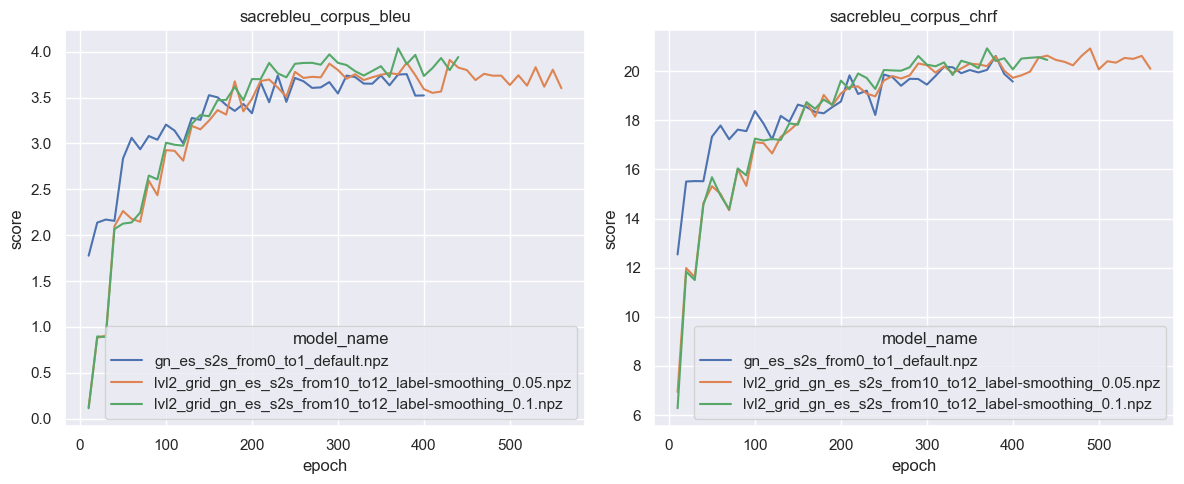

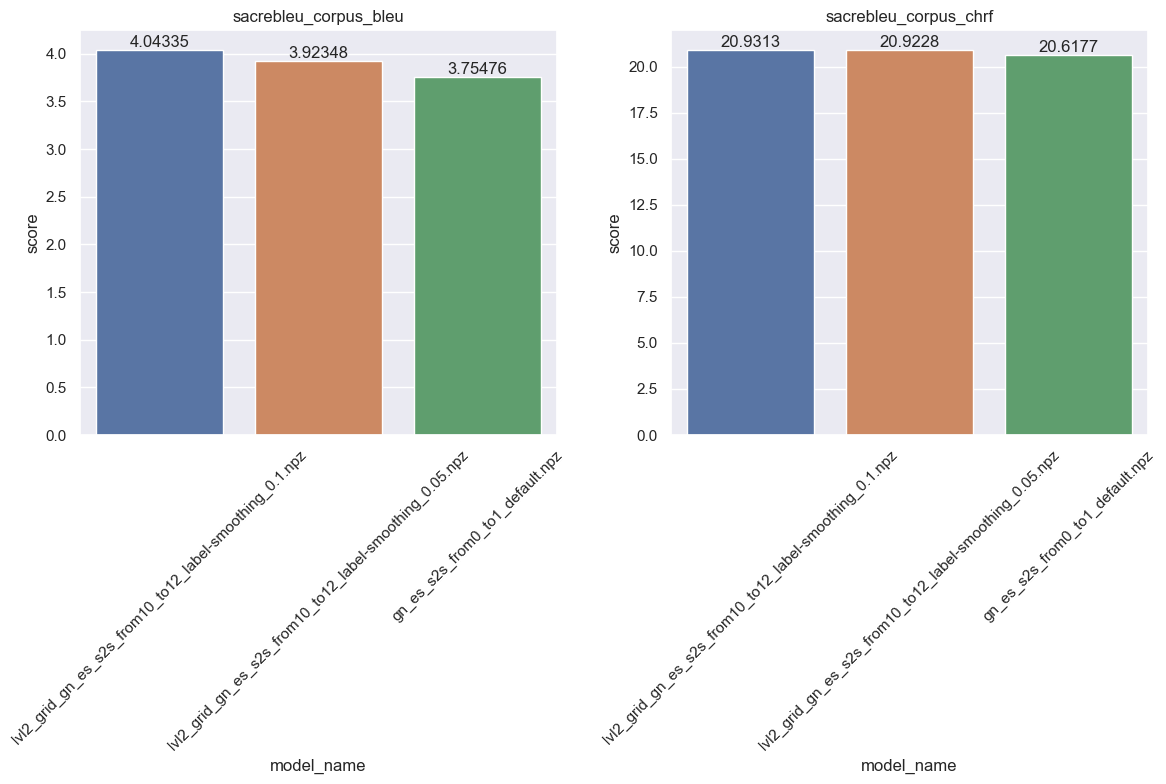

In [16]:
enc_dec_depth_df = extract_features(gn_es_results, gn_es_lvl2_results, 'label-smoothing')
plots.plot_metric_by_epoch_foreach_model(enc_dec_depth_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,5));
plots.plot_max_score_by_model(enc_dec_depth_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,8));

**Sentence max length**

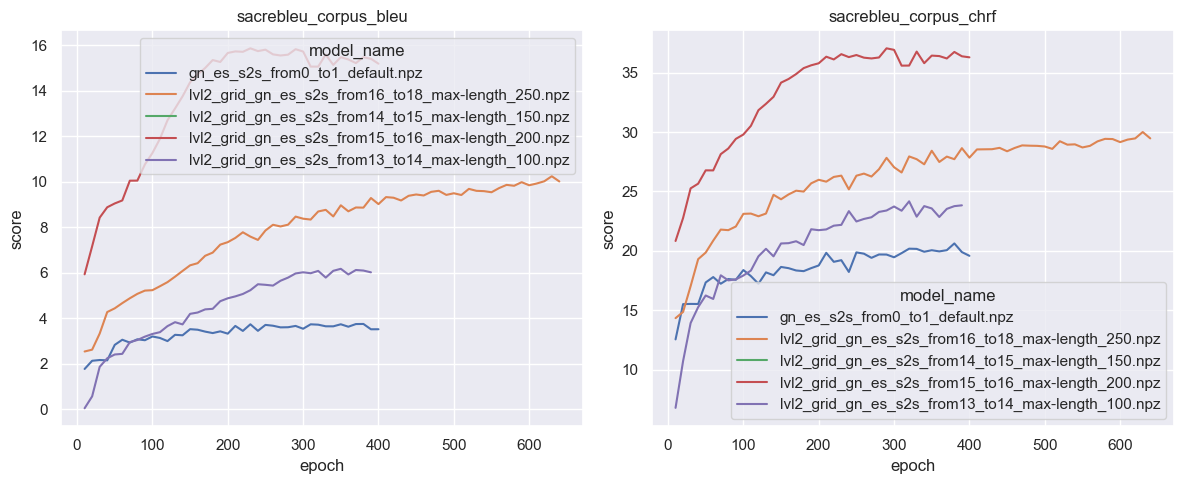

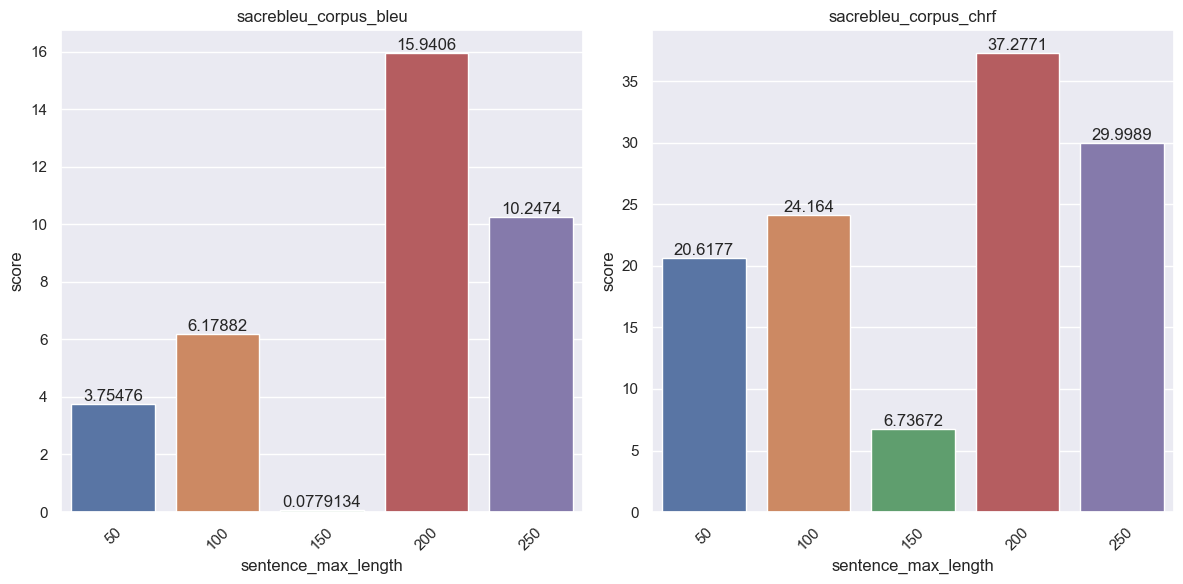

In [17]:
sentence_max_length_df = extract_features(gn_es_results, gn_es_lvl2_results, 'max-length', column='model_name')
plots.plot_metric_by_epoch_foreach_model(sentence_max_length_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,5));
sentence_max_length_df['sentence_max_length'] = [int(x[-7:-4]) if 'max-length' in x else 50 for x in sentence_max_length_df['model_name']]
plots.plot_max_score_by_model(sentence_max_length_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,6), x_col='sentence_max_length', sort_by='sentence_max_length', ascending=True);

## **Level 3**

In [22]:
lvl3_df = pd.read_csv(LVL3_RESULTS)
lvl3_df.tail()

,date,model_name,source,target,score_type,score,epoch,parameters
523,2023-08-06 10:49:33.612594,lvl3_grid_gn_es_s2s_from6_to8_seed1234_learn-r...,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,0.000000,510,"{'type': ['s2s'], 'max-length-crop': [], 'drop..."
524,2023-08-06 10:54:41.523900,lvl3_grid_gn_es_s2s_from2_to4_seed1234_learn-r...,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,23.243544,460,"{'type': ['s2s'], 'max-length-crop': [], 'drop..."
525,2023-08-06 10:54:41.523900,lvl3_grid_gn_es_s2s_from2_to4_seed1234_learn-r...,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,4.375350,460,"{'type': ['s2s'], 'max-length-crop': [], 'drop..."
526,2023-08-06 10:55:33.521331,lvl3_grid_gn_es_s2s_from6_to8_seed1234_learn-r...,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,1.528380,520,"{'type': ['s2s'], 'max-length-crop': [], 'drop..."
527,2023-08-06 10:55:33.521331,lvl3_grid_gn_es_s2s_from6_to8_seed1234_learn-r...,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,0.000000,520,"{'type': ['s2s'], 'max-length-crop': [], 'drop..."


In [23]:
gn_es_lvl3_results = lvl3_df[lvl3_df['source'].str.contains('gn', regex=False)]
es_gn_lvl3_results = lvl3_df[lvl3_df['source'].str.contains('es', regex=False)]

```
(placeholder)

- (enc-depth, dec-depth):   [(1, 1) {default}, (2, 2), (4, 4), (6, 6), (8, 8)]
- dropout-rnn:              [0 {default}, 0.25, 0.5]
- enc-cell:                 ["lstm", "tanh", "gru" {default}]
- sentencepiece-dim-vocabs: [2^13, 2^14 {our default}, 2^15]
- label-smoothing:          [0 {default}, 0.05, 0.1]
- max-length:               [100, 150, 200, 250]
- crop-max-length:          [true {our default}]

```

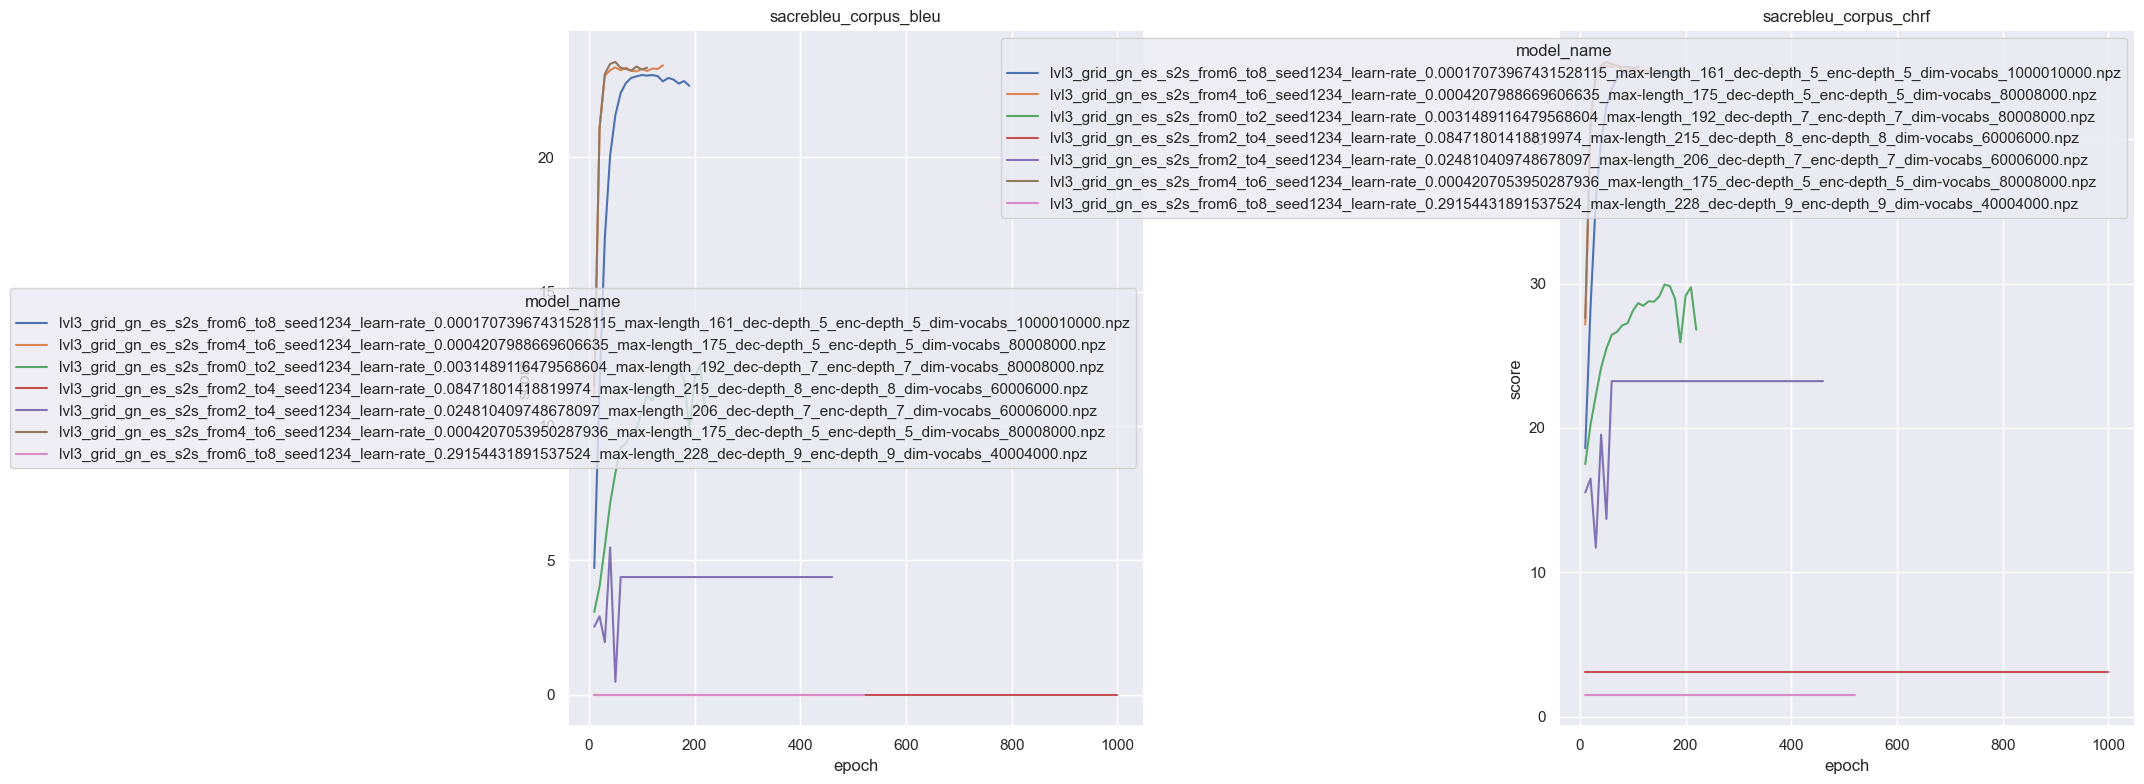

f:\my_year2023\PLN\code\MARIAN\notebooks\utils\plots.py:76: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


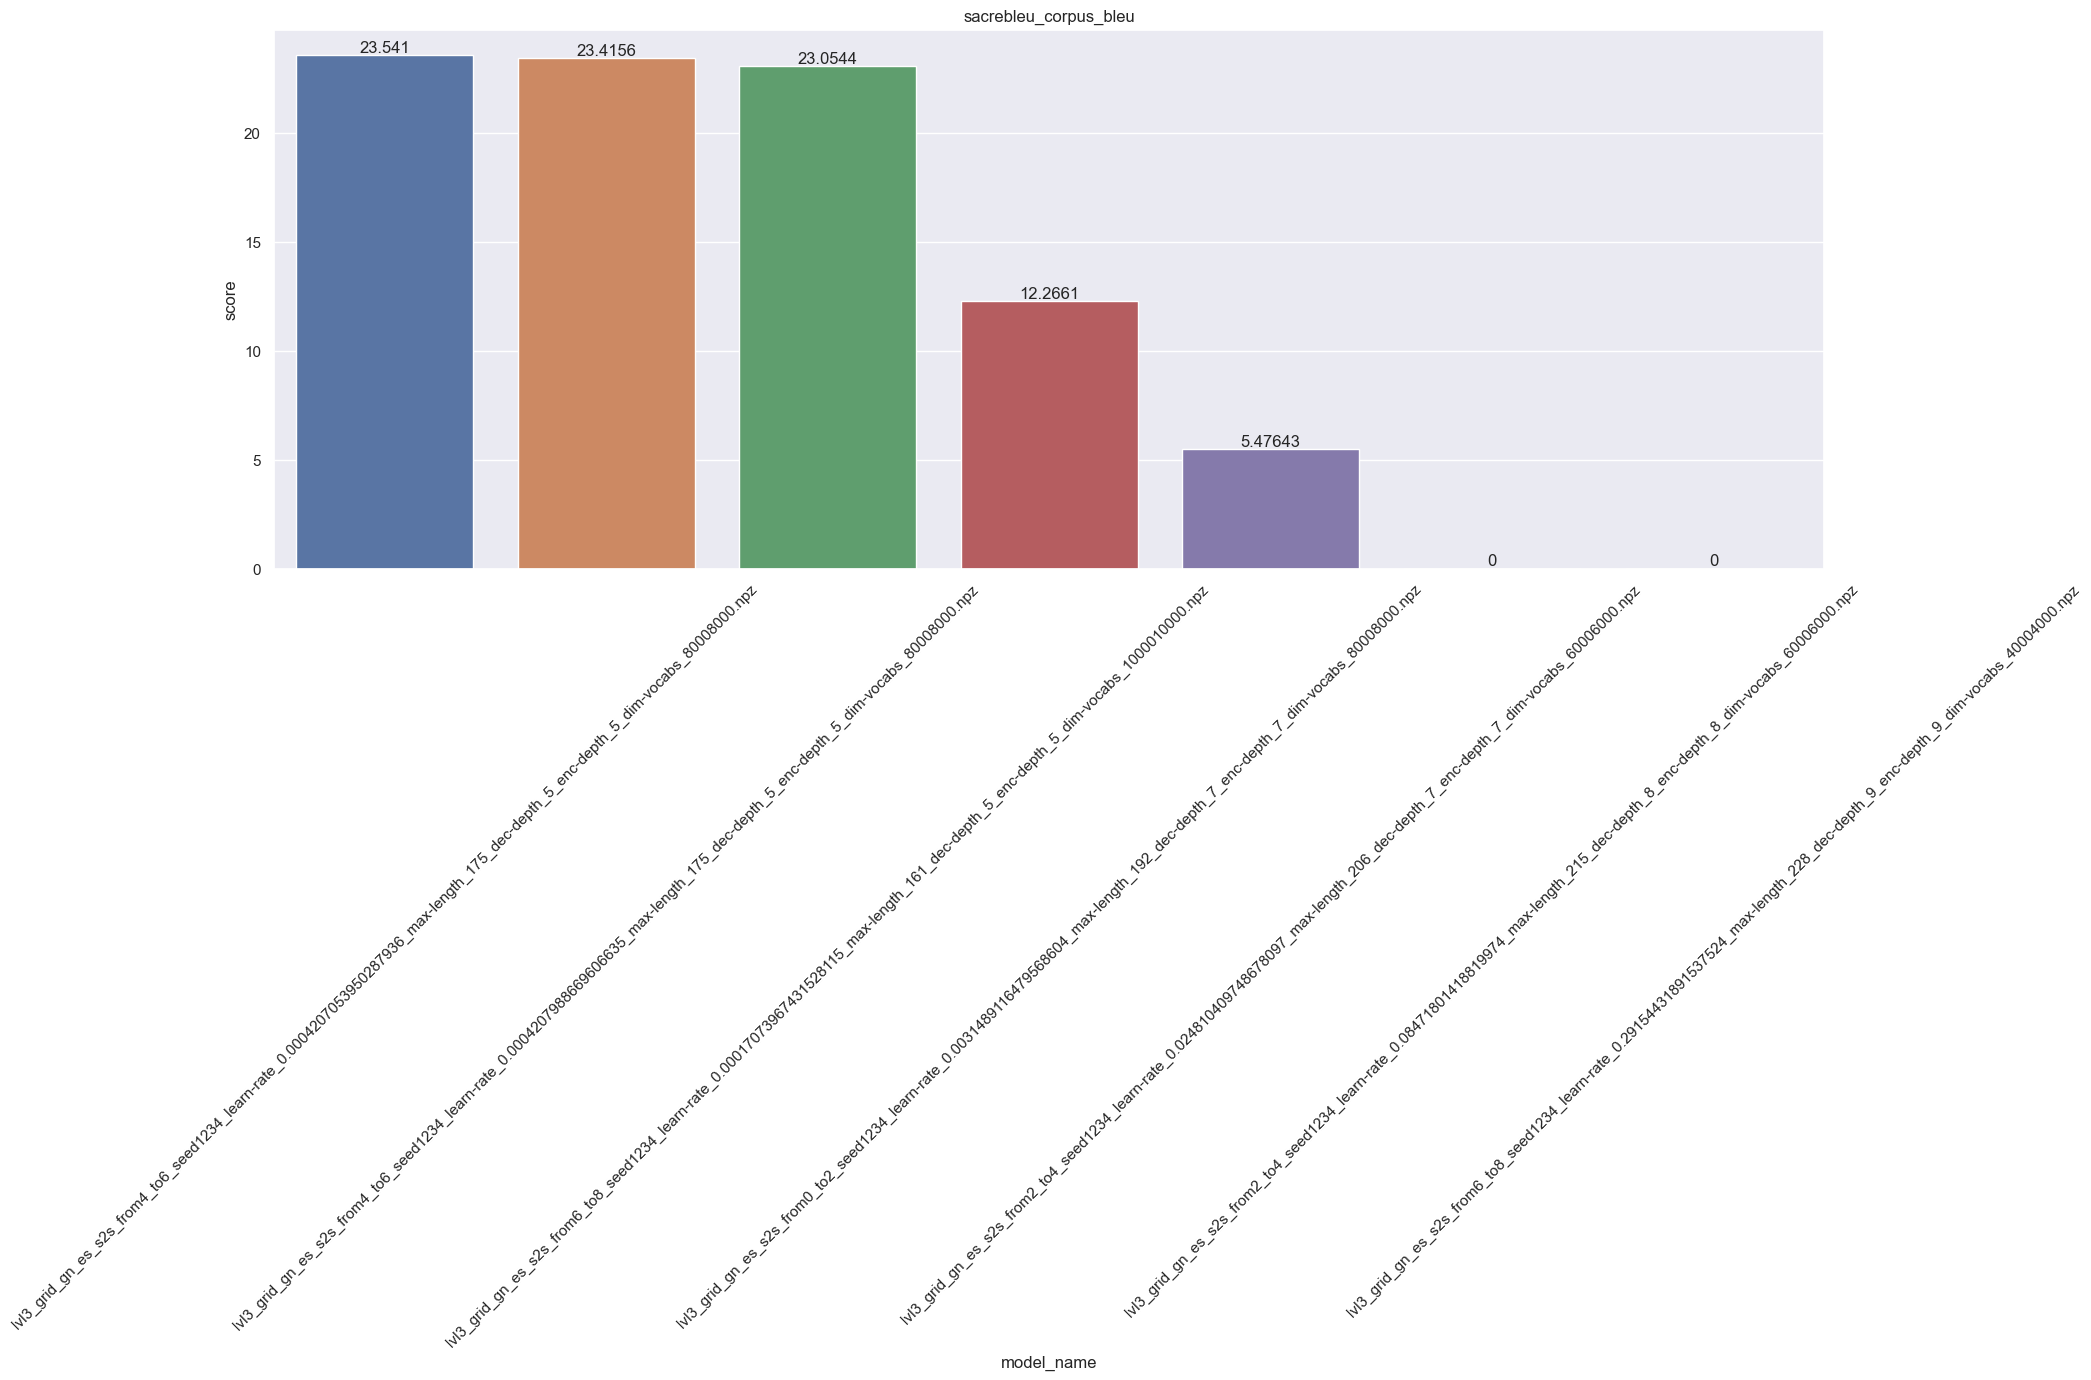

f:\my_year2023\PLN\code\MARIAN\notebooks\utils\plots.py:76: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


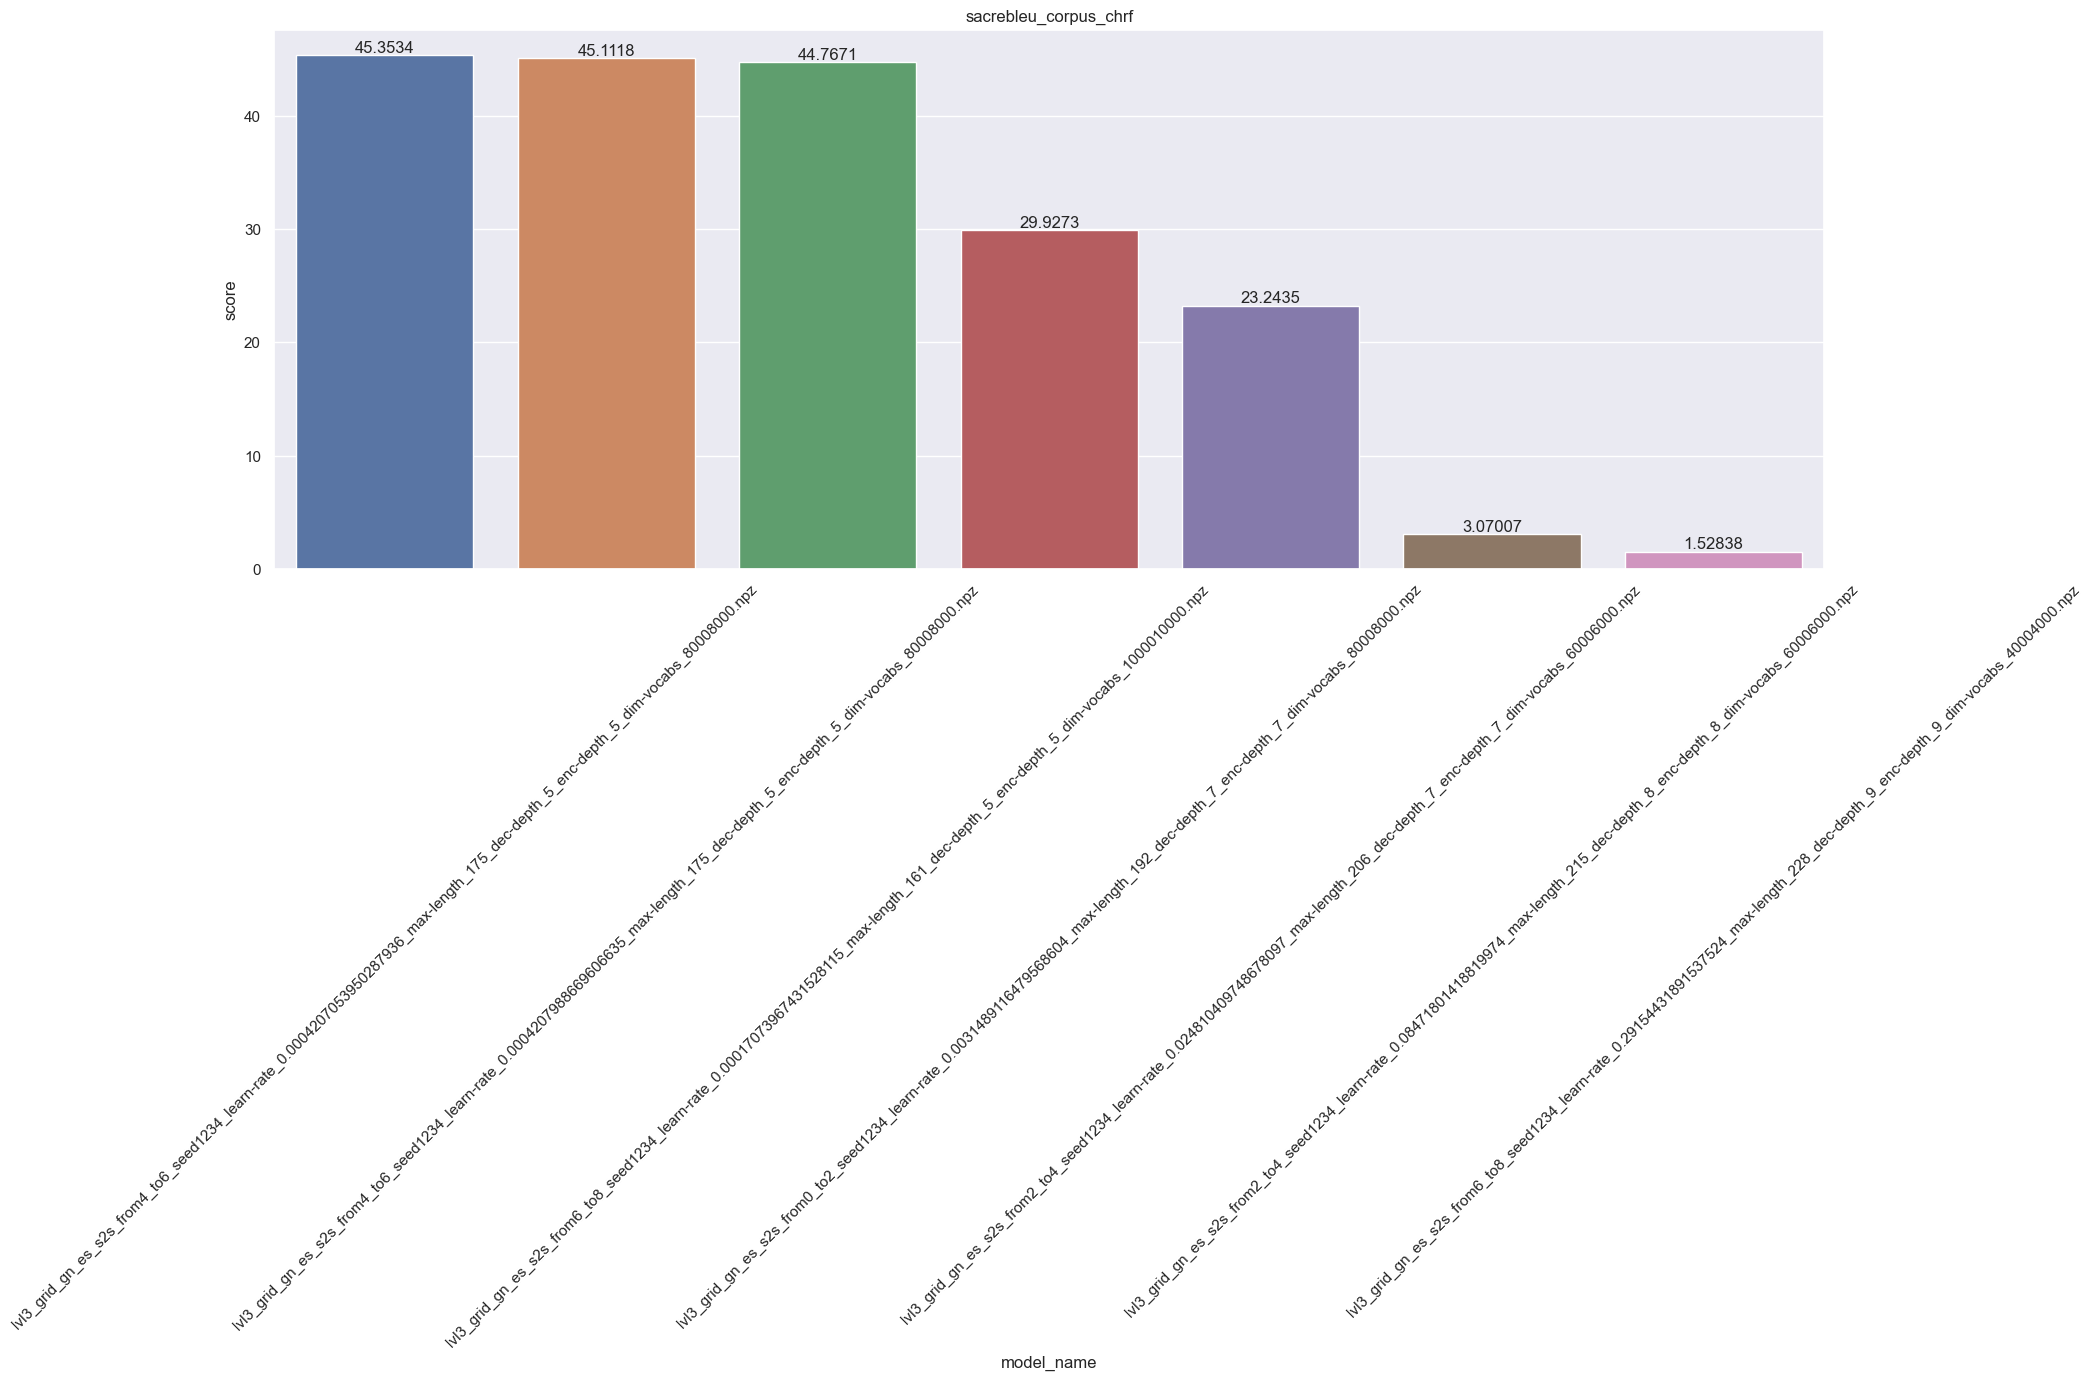

In [24]:
plots.plot_metric_by_epoch_foreach_model(gn_es_lvl3_results, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(20,8));
plots.plot_max_score_by_model(gn_es_lvl3_results, metrics=['sacrebleu_corpus_bleu'], figsize=(20,7));
plots.plot_max_score_by_model(gn_es_lvl3_results, metrics=['sacrebleu_corpus_chrf'], figsize=(20,7));